In [ ]:
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
from keras.models import Model, Sequential
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.layers import Activation, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from sklearn.model_selection import KFold

To check if GPU runtime is used in Colab

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

Uploading the zipped dataset 

In [ ]:
from google.colab import files
uploaded=files.upload()

Unzip the dataset

In [ ]:
!unzip "data.zip"

Loading the training set images using imread() of OpenCV

In [ ]:
path="data/train/"
angry = path + "angry/"
disgusted = path + "disgusted/"
happy = path + "happy/"
sad = path + "sad/"
suprised = path + "surprised/"
fearful = path + "fearful/"
neutral = path + "neutral/"
import os
from os import listdir
import cv2

def loadImages(path):
    loadedImages = []
    for image in os.listdir(path):
        img = cv2.imread(os.path.join(path, image))
        img = cv2.resize(img,(50,50))
        if img is not None:
          loadedImages.append(img)
    return loadedImages



In [ ]:
angry_data=loadImages(angry)
sad_data=loadImages(sad)
neutral_data=loadImages(neutral)
suprised_data=loadImages(suprised)
happy_data=loadImages(happy)
disgusted_data=loadImages(disgusted)
fearful_data=loadImages(fearful)


In [ ]:
total_X=[]
label=[]

for i in range(len(angry_data)):
  total_X.append(angry_data[i])
  label.append("0")

for p in range(len(sad_data)):
  total_X.append(sad_data[p])
  label.append("1")

for j in range(len(suprised_data)):
  total_X.append(suprised_data[j])
  label.append("2")

for l in range(len(happy_data)):
  total_X.append(happy_data[l])
  label.append("3")

for k in range(len(neutral_data)):
  total_X.append(neutral_data[k])
  label.append("4")

for m in range(len(fearful_data)):
  total_X.append(fearful_data[m])
  label.append("5")

for n in range(len(disgusted_data)):
  total_X.append(disgusted_data[n])
  label.append("6")

total_X = np.asarray(total_X)
label = np.asarray(label)

Data Exploration *Understanding the distribution of data*

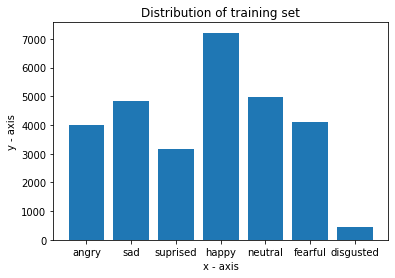

In [ ]:
import matplotlib.pyplot as plt

left = [1, 2, 3, 4, 5, 6, 7]
height = [len(angry_data), len(sad_data), len(suprised_data), len(happy_data), len(neutral_data), len(fearful_data), len(disgusted_data)]

tick_label = ['angry', 'sad', 'suprised', 'happy', 'neutral','fearful','disgusted']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Distribution of training set')

plt.show()

In [ ]:
print(type(total_X))
print(total_X.shape)

<class 'numpy.ndarray'>
(28709, 50, 50, 3)


Loading the test data using imread() of OpenCV

In [ ]:
path="data/test/"
angry = path + "angry/"
disgusted = path + "disgusted/"
happy = path + "happy/"
sad = path + "sad/"
suprised = path + "surprised/"
fearful = path + "fearful/"
neutral = path + "neutral/"
import os
from os import listdir
import cv2

def loadImages(path):
    loadedImages = []
    for image in os.listdir(path):
        img = cv2.imread(os.path.join(path, image))
        img = cv2.resize(img,(50,50))
        if img is not None:
          loadedImages.append(img)
    return loadedImages


angry_data=loadImages(angry)
sad_data=loadImages(sad)
neutral_data=loadImages(neutral)
suprised_data=loadImages(suprised)
happy_data=loadImages(happy)
disgusted_data=loadImages(disgusted)
fearful_data=loadImages(fearful)

Val_X=[]
Val_label=[]

for i in range(958):
  Val_X.append(angry_data[i])
  Val_label.append("0")

#p=0
for p in range(1247):
  Val_X.append(sad_data[p])
  Val_label.append("1")

for j in range(831):
  Val_X.append(suprised_data[j])
  Val_label.append("2")

for l in range(1774):
  Val_X.append(happy_data[l])
  Val_label.append("3")

for k in range(1233):
  Val_X.append(neutral_data[k])
  Val_label.append("4")

for m in range(1024):
  Val_X.append(fearful_data[m])
  Val_label.append("5")

for n in range(111):
  Val_X.append(disgusted_data[n])
  Val_label.append("6")

Val_X = np.asarray(Val_X)
Val_label = np.asarray(Val_label)



Val_label = to_categorical(Val_label)


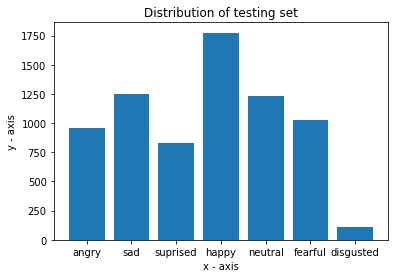

In [ ]:
import matplotlib.pyplot as plt

left = [1, 2, 3, 4, 5, 6, 7]
height = [len(angry_data), len(sad_data), len(suprised_data), len(happy_data), len(neutral_data), len(fearful_data), len(disgusted_data)]

tick_label = ['angry', 'sad', 'suprised', 'happy', 'neutral','fearful','disgusted']

plt.bar(left, height, tick_label = tick_label,
        width = 0.8)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Distribution of testing set')

plt.show()

Determining training data and testing data

In [ ]:
X_train, X_test, y_train, y_test = total_X, Val_X, label, Val_label

Defining the CNN model

In [ ]:
import keras

#transfer learning is used here => VGG16 pre-trained model is fine-tuned for FER

def create_model():
  base_model=VGG16 (weights='imagenet', include_top=False, input_tensor = keras.Input(shape=(50, 50, 3))) 
  x=base_model.output
  x= GlobalAveragePooling2D()(x)
  x=Dense(100, activation='relu') (x)
  x = Dropout (0.15) (x)
  x = Dense (60, activation='relu') (x)
  x = Dense (30, activation='relu') (x)
  predictions = Dense(7, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  for layer in base_model.layers:
    layer.trainable = False
  model.compile (loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model


Determining the optimal paramters

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model)

In [ ]:
from sklearn.model_selection import GridSearchCV

epochs = [20,30,40]
batch_size = [50,100,150,200]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
#will print the epochs and batch-size that yielded the best accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
